# Artificial Neural Network (ANN)

### Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
import keras.utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras import utils as np_utils

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
pd.options.display.max_columns = None

## Data Preprocessing

### Importing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MLfEA Project 2/UK_accidents_preprocessed.csv')

In [ ]:
data.head()

,Accident_Index,Accident_Severity,Road_Class,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Hour_of_Day,Year,Month,Day_of_Week,Multiple_Vehicles_involved,Urban_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,200501BS00004,Slight,Trunk Routes (A),30.0,Open Street,Daylight,Fine & no high winds,Dry,10,2005,1,Friday,0,1,Car,Female,46-55,1151-1999cc,2-5
1,200501BS00005,Slight,Unclassified Roads,30.0,Open Street,Darkness - lighting unknown,Fine & no high winds,Wet or damp,21,2005,1,Monday,0,1,Motorcycle,Male,46-55,0-125cc,>10
2,200501BS00006,Slight,Unclassified Roads,30.0,Open Street,Daylight,Raining & no high winds,Wet or damp,12,2005,1,Tuesday,1,1,Car,Male,46-55,2000-2999cc,New (0-1)
3,200501BS00009,Slight,Trunk Routes (A),30.0,Open Street,Daylight,Fine & no high winds,Dry,17,2005,1,Friday,0,1,Car,Male,66-75,>4000cc,>10
4,200501BS00010,Slight,Trunk Routes (A),30.0,Junction,Darkness - lights lit,Fine & no high winds,Dry,22,2005,1,Saturday,1,1,Car,Male,26-35,1151-1999cc,>10


In [ ]:
X = data.drop(['Accident_Index','Accident_Severity'],axis=1)
y = data['Accident_Severity']

### Encoding the Categorical Data

In [ ]:
X = pd.get_dummies(X, columns=['Road_Class','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Hour_of_Day','Year','Month','Day_of_Week','Multiple_Vehicles_involved','Urban_Area','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'])

In [ ]:
X.head(10)

,Road_Class_Distributor Roads (B),Road_Class_Minor Roads (C),Road_Class_Motorway (A/M),Road_Class_Trunk Routes (A),Road_Class_Unclassified Roads,Speed_limit_10.0,Speed_limit_15.0,Speed_limit_20.0,Speed_limit_30.0,Speed_limit_40.0,Speed_limit_50.0,Speed_limit_60.0,Speed_limit_70.0,Junction_Detail_Junction,Junction_Detail_Open Street,Junction_Detail_Roundabout,Light_Conditions_Darkness - lighting unknown,Light_Conditions_Darkness - lights lit,Light_Conditions_Darkness - lights unlit,Light_Conditions_Darkness - no lighting,Light_Conditions_Daylight,Weather_Conditions_Fine & high winds,Weather_Conditions_Fine & no high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other or Unknown,Weather_Conditions_Raining & high winds,Weather_Conditions_Raining & no high winds,Weather_Conditions_Snowing & high winds,Weather_Conditions_Snowing & no high winds,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3cm. deep,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp,Hour_of_Day_0,Hour_of_Day_1,Hour_of_Day_2,Hour_of_Day_3,Hour_of_Day_4,Hour_of_Day_5,Hour_of_Day_6,Hour_of_Day_7,Hour_of_Day_8,Hour_of_Day_9,Hour_of_Day_10,Hour_of_Day_11,Hour_of_Day_12,Hour_of_Day_13,Hour_of_Day_14,Hour_of_Day_15,Hour_of_Day_16,Hour_of_Day_17,Hour_of_Day_18,Hour_of_Day_19,Hour_of_Day_20,Hour_of_Day_21,Hour_of_Day_22,Hour_of_Day_23,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Multiple_Vehicles_involved_0,Multiple_Vehicles_involved_1,Urban_Area_0,Urban_Area_1,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Sex_of_Driver_Female,Sex_of_Driver_Male,Age_of_Driver_18-20,Age_of_Driver_21-25,Age_of_Driver_26-35,Age_of_Driver_36-45,Age_of_Driver_46-55,Age_of_Driver_56-65,Age_of_Driver_66-75,Age_of_Driver_<18,Age_of_Driver_>75,Engine_Capacity_(CC)_0-125cc,Engine_Capacity_(CC)_1151-1999cc,Engine_Capacity_(CC)_126-350cc,Engine_Capacity_(CC)_2000-2999cc,Engine_Capacity_(CC)_3000-3999cc,Engine_Capacity_(CC)_351-600cc,Engine_Capacity_(CC)_601-1150cc,Engine_Capacity_(CC)_>4000cc,Age_of_Vehicle_2-5,Age_of_Vehicle_6-10,Age_of_Vehicle_>10,Age_of_Vehicle_New (0-1)
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [ ]:
#y_encoder = OneHotEncoder()
#y_encoder.fit(y.values.reshape(-1,1))
#y = y_encoder.transform(y.values.reshape(-1,1)).toarray()

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
y = np_utils.to_categorical(encoded_y)

In [ ]:
X = X.values

In [ ]:
X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

### Splitting the Dataset into Training Set and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Building and Training the ANN

### Option 1

In [ ]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
epochs_hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=20)

Epoch 1/20
29648/29648 [==============================] - 105s 4ms/step - loss: 0.4864 - accuracy: 0.8340 - val_loss: 0.4621 - val_accuracy: 0.8369
Epoch 2/20
29648/29648 [==============================] - 104s 4ms/step - loss: 0.4599 - accuracy: 0.8374 - val_loss: 0.4599 - val_accuracy: 0.8368
Epoch 3/20
29648/29648 [==============================] - 106s 4ms/step - loss: 0.4558 - accuracy: 0.8390 - val_loss: 0.4600 - val_accuracy: 0.8365
Epoch 4/20
29648/29648 [==============================] - 105s 4ms/step - loss: 0.4564 - accuracy: 0.8384 - val_loss: 0.4601 - val_accuracy: 0.8369
Epoch 5/20
29648/29648 [==============================] - 105s 4ms/step - loss: 0.4589 - accuracy: 0.8372 - val_loss: 0.4593 - val_accuracy: 0.8367
Epoch 6/20
29648/29648 [==============================] - 106s 4ms/step - loss: 0.4571 - accuracy: 0.8382 - val_loss: 0.4593 - val_accuracy: 0.8368
Epoch 7/20
29648/29648 [==============================] - 105s 4ms/step - loss: 0.4569 - accuracy: 0.8380 - val_

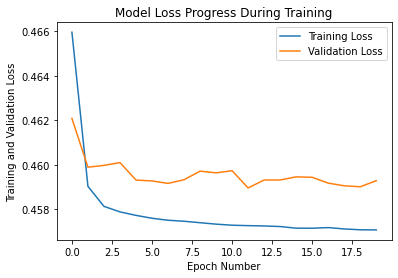

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#y_pred = model.predict_classes(X_test) + 1
#y_pred = y_pred.round()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4244
           1       0.50      0.05      0.08     44487
           2       0.84      0.99      0.91    247744

   micro avg       0.84      0.83      0.84    296475
   macro avg       0.45      0.34      0.33    296475
weighted avg       0.78      0.83      0.77    296475
 samples avg       0.83      0.83      0.83    296475



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#importing confusion matrix
#from sklearn.metrics import confusion_matrix
#confusion = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix\n')
#print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

### Option 2

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

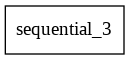

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
epochs_hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=20)

Epoch 1/20
29648/29648 [==============================] - 106s 4ms/step - loss: 0.4704 - accuracy: 0.8340 - val_loss: 0.4597 - val_accuracy: 0.8367
Epoch 2/20
29648/29648 [==============================] - 104s 4ms/step - loss: 0.4589 - accuracy: 0.8372 - val_loss: 0.4592 - val_accuracy: 0.8366
Epoch 3/20
29648/29648 [==============================] - 105s 4ms/step - loss: 0.4570 - accuracy: 0.8375 - val_loss: 0.4594 - val_accuracy: 0.8366
Epoch 4/20
29648/29648 [==============================] - 105s 4ms/step - loss: 0.4580 - accuracy: 0.8372 - val_loss: 0.4590 - val_accuracy: 0.8367
Epoch 5/20
29648/29648 [==============================] - 104s 4ms/step - loss: 0.4580 - accuracy: 0.8373 - val_loss: 0.4586 - val_accuracy: 0.8367
Epoch 6/20
29648/29648 [==============================] - 106s 4ms/step - loss: 0.4558 - accuracy: 0.8381 - val_loss: 0.4593 - val_accuracy: 0.8367
Epoch 7/20
29648/29648 [==============================] - 105s 4ms/step - loss: 0.4551 - accuracy: 0.8384 - val_

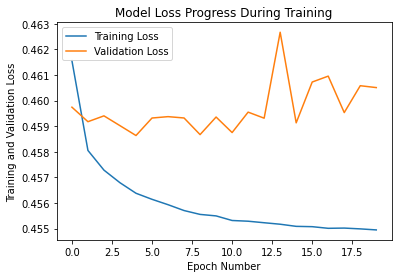

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()

In [ ]:
accuracy_score(y_test, y_pred)

0.8318576608483008

In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4244
           1       0.53      0.02      0.03     44487
           2       0.84      0.99      0.91    247744

   micro avg       0.84      0.83      0.84    296475
   macro avg       0.46      0.34      0.31    296475
weighted avg       0.78      0.83      0.77    296475
 samples avg       0.83      0.83      0.83    296475



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Option 3

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MLfEA Project 2/UK_accidents_preprocessed.csv')

data.loc[data.Accident_Severity == 'Slight', 'Accident_Severity'] = 0
data.loc[data.Accident_Severity == 'Serious', 'Accident_Severity'] = 1
data.loc[data.Accident_Severity == 'Fatal', 'Accident_Severity'] = 1

data = pd.get_dummies(data, columns=['Road_Class','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Hour_of_Day','Year','Month','Day_of_Week','Multiple_Vehicles_involved','Urban_Area','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'])

X = data.drop(['Accident_Index','Accident_Severity'],axis=1).values
y = data['Accident_Severity'].values

X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs_hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=20)

y_pred = model.predict(X)
y_pred = (y_pred > 0.5)

Epoch 1/20
29648/29648 [==============================] - 83s 3ms/step - loss: 0.4225 - accuracy: 0.8371 - val_loss: 0.4156 - val_accuracy: 0.8380
Epoch 2/20
29648/29648 [==============================] - 83s 3ms/step - loss: 0.4150 - accuracy: 0.8388 - val_loss: 0.4158 - val_accuracy: 0.8379
Epoch 3/20
29648/29648 [==============================] - 82s 3ms/step - loss: 0.4147 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.8380
Epoch 4/20
29648/29648 [==============================] - 81s 3ms/step - loss: 0.4136 - accuracy: 0.8391 - val_loss: 0.4147 - val_accuracy: 0.8377
Epoch 5/20
29648/29648 [==============================] - 81s 3ms/step - loss: 0.4147 - accuracy: 0.8384 - val_loss: 0.4147 - val_accuracy: 0.8377
Epoch 6/20
29648/29648 [==============================] - 82s 3ms/step - loss: 0.4141 - accuracy: 0.8386 - val_loss: 0.4145 - val_accuracy: 0.8378
Epoch 7/20
29648/29648 [==============================] - 83s 3ms/step - loss: 0.4131 - accuracy: 0.8391 - val_loss: 0

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MLfEA Project 2/UK_accidents_preprocessed.csv')

In [ ]:
data.loc[data.Accident_Severity == 'Slight', 'Accident_Severity'] = 0
data.loc[data.Accident_Severity == 'Serious', 'Accident_Severity'] = 1
data.loc[data.Accident_Severity == 'Fatal', 'Accident_Severity'] = 1

In [ ]:
data = pd.get_dummies(data, columns=['Road_Class','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Hour_of_Day','Year','Month','Day_of_Week','Multiple_Vehicles_involved','Urban_Area','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'])

In [ ]:
X = data.drop(['Accident_Index','Accident_Severity'],axis=1).values
y = data['Accident_Severity'].values

In [ ]:
print(y)

[0 0 0 ... 0 0 1]


In [ ]:
X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

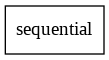

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
epochs_hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=20)

Epoch 1/20
29648/29648 [==============================] - 74s 2ms/step - loss: 0.4312 - accuracy: 0.8310 - val_loss: 0.4154 - val_accuracy: 0.8378
Epoch 2/20
29648/29648 [==============================] - 73s 2ms/step - loss: 0.4153 - accuracy: 0.8386 - val_loss: 0.4149 - val_accuracy: 0.8378
Epoch 3/20
29648/29648 [==============================] - 74s 2ms/step - loss: 0.4130 - accuracy: 0.8398 - val_loss: 0.4152 - val_accuracy: 0.8378
Epoch 4/20
29648/29648 [==============================] - 74s 2ms/step - loss: 0.4136 - accuracy: 0.8392 - val_loss: 0.4147 - val_accuracy: 0.8379
Epoch 5/20
29648/29648 [==============================] - 73s 2ms/step - loss: 0.4138 - accuracy: 0.8389 - val_loss: 0.4146 - val_accuracy: 0.8380
Epoch 6/20
29648/29648 [==============================] - 73s 2ms/step - loss: 0.4132 - accuracy: 0.8391 - val_loss: 0.4145 - val_accuracy: 0.8380
Epoch 7/20
29648/29648 [==============================] - 74s 2ms/step - loss: 0.4135 - accuracy: 0.8392 - val_loss: 0

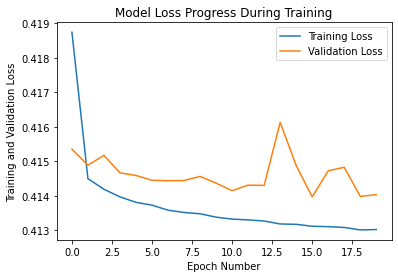

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [ ]:
y_pred = model.predict(X)
y_pred = (y_pred > 0.5)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 1.]
 [0. 0.]
 [0. 0.]]


In [ ]:
confusion_matrix(y_pred,y)

array([[245691,  45967],
       [  2053,   2764]])

In [ ]:
accuracy_score(y,y_pred)

0.8385101715358898

In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y, y_pred.argmax(axis=1))))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y, y_pred, target_names=['Slight', 'Serious and Fatal']))

Confusion Matrix

[[1227848   11700]
 [ 227688   15136]]

Accuracy: 0.84


Classification Report

                   precision    recall  f1-score   support

           Slight       0.84      0.99      0.91   1239548
Serious and Fatal       0.56      0.06      0.11    242824

         accuracy                           0.84   1482372
        macro avg       0.70      0.53      0.51   1482372
     weighted avg       0.80      0.84      0.78   1482372



In [ ]:
y_pred2 = np.argmax(y_pred,axis=1)

In [ ]:
pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0.0,247744,247744
1.0,48731,48731
All,296475,296475


### Option 4

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MLfEA Project 2/UK_accidents_preprocessed.csv')

In [ ]:
data = pd.get_dummies(data, columns=['Road_Class','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Hour_of_Day','Year','Month','Day_of_Week','Multiple_Vehicles_involved','Urban_Area','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'])

In [ ]:
data = data.values

In [ ]:
X = data[:,2:]
y = data[:,1]

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_y)

In [ ]:
X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs_hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=10)

Epoch 1/10
29648/29648 [==============================] - 86s 3ms/step - loss: 0.4755 - accuracy: 0.8364 - val_loss: 0.4634 - val_accuracy: 0.8364
Epoch 2/10
29648/29648 [==============================] - 85s 3ms/step - loss: 0.4594 - accuracy: 0.8370 - val_loss: 0.4606 - val_accuracy: 0.8361
Epoch 3/10
29648/29648 [==============================] - 86s 3ms/step - loss: 0.4585 - accuracy: 0.8369 - val_loss: 0.4603 - val_accuracy: 0.8365
Epoch 4/10
29648/29648 [==============================] - 86s 3ms/step - loss: 0.4587 - accuracy: 0.8368 - val_loss: 0.4595 - val_accuracy: 0.8363
Epoch 5/10
29648/29648 [==============================] - 85s 3ms/step - loss: 0.4581 - accuracy: 0.8374 - val_loss: 0.4601 - val_accuracy: 0.8365
Epoch 6/10
29648/29648 [==============================] - 85s 3ms/step - loss: 0.4567 - accuracy: 0.8380 - val_loss: 0.4594 - val_accuracy: 0.8368
Epoch 7/10
29648/29648 [==============================] - 85s 3ms/step - loss: 0.4569 - accuracy: 0.8378 - val_loss: 0

In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred2 = np.argmax(y_pred,axis=1)

In [ ]:
y_test2 = np.argmax(y_test,axis=1)

In [ ]:
pd.crosstab(y_test2, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,All
True,,,
0,381,3863,4244
1,2325,42162,44487
2,2059,245685,247744
All,4765,291710,296475


In [ ]:
pd.crosstab(y_test.argmax(axis=1), y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,All
True,,,
0,290,3954,4244
1,1784,42703,44487
2,1442,246302,247744
All,3516,292959,296475


In [ ]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[     0,    381,   3863],
       [     0,   2325,  42162],
       [     0,   2059, 245685]])

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4244
           1       0.49      0.05      0.09     44487
           2       0.84      0.99      0.91    247744

    accuracy                           0.84    296475
   macro avg       0.44      0.35      0.34    296475
weighted avg       0.78      0.84      0.78    296475



In [ ]:
cm = confusion_matrix(y_test2,y_pred2)
np.set_printoptions(precision=2)
print(cm)
plt.figure()

[[     0    381   3863]
 [     0   2325  42162]
 [     0   2059 245685]]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(np.argmax(np.argmax(y_test,axis=1),axis=1), np.argmax(y_pred,axis=1))))

print('Micro Precision: {:.2f}'.format(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), target_names=['Class 1', 'Class 2', 'Class 3']))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y.argmax(axis=1), y_pred.argmax(axis=1))))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y.argmax(axis=1), y_pred.argmax(axis=1), target_names=['Fatal', 'Serious', 'Slight']))

Confusion Matrix

[[      0    1640   19211]
 [      0    7834  214139]
 [      0    6349 1233199]]

Accuracy: 0.84


Classification Report



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00     20851
     Serious       0.50      0.04      0.07    221973
      Slight       0.84      0.99      0.91   1239548

    accuracy                           0.84   1482372
   macro avg       0.45      0.34      0.33   1482372
weighted avg       0.78      0.84      0.77   1482372



### Option 5

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MLfEA Project 2/UK_accidents_preprocessed.csv')

In [ ]:
data = pd.get_dummies(data, columns=['Road_Class','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Hour_of_Day','Year','Month','Day_of_Week','Multiple_Vehicles_involved','Urban_Area','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'])

In [ ]:
data = pd.concat([data[data['Accident_Severity'] == 'Slight'].sample(20000, replace=True),
                    data[data['Accident_Severity'] == 'Serious'].sample(20000, replace=True),
                    data[data['Accident_Severity'] == 'Fatal'].sample(20000, replace=True)])

In [ ]:
data.tail()

,Accident_Index,Accident_Severity,Road_Class_Distributor Roads (B),Road_Class_Minor Roads (C),Road_Class_Motorway (A/M),Road_Class_Trunk Routes (A),Road_Class_Unclassified Roads,Speed_limit_10.0,Speed_limit_15.0,Speed_limit_20.0,Speed_limit_30.0,Speed_limit_40.0,Speed_limit_50.0,Speed_limit_60.0,Speed_limit_70.0,Junction_Detail_Junction,Junction_Detail_Open Street,Junction_Detail_Roundabout,Light_Conditions_Darkness - lighting unknown,Light_Conditions_Darkness - lights lit,Light_Conditions_Darkness - lights unlit,Light_Conditions_Darkness - no lighting,Light_Conditions_Daylight,Weather_Conditions_Fine & high winds,Weather_Conditions_Fine & no high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other or Unknown,Weather_Conditions_Raining & high winds,Weather_Conditions_Raining & no high winds,Weather_Conditions_Snowing & high winds,Weather_Conditions_Snowing & no high winds,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3cm. deep,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp,Hour_of_Day_0,Hour_of_Day_1,Hour_of_Day_2,Hour_of_Day_3,Hour_of_Day_4,Hour_of_Day_5,Hour_of_Day_6,Hour_of_Day_7,Hour_of_Day_8,Hour_of_Day_9,Hour_of_Day_10,Hour_of_Day_11,Hour_of_Day_12,Hour_of_Day_13,Hour_of_Day_14,Hour_of_Day_15,Hour_of_Day_16,Hour_of_Day_17,Hour_of_Day_18,Hour_of_Day_19,Hour_of_Day_20,Hour_of_Day_21,Hour_of_Day_22,Hour_of_Day_23,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Multiple_Vehicles_involved_0,Multiple_Vehicles_involved_1,Urban_Area_0,Urban_Area_1,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Sex_of_Driver_Female,Sex_of_Driver_Male,Age_of_Driver_18-20,Age_of_Driver_21-25,Age_of_Driver_26-35,Age_of_Driver_36-45,Age_of_Driver_46-55,Age_of_Driver_56-65,Age_of_Driver_66-75,Age_of_Driver_<18,Age_of_Driver_>75,Engine_Capacity_(CC)_0-125cc,Engine_Capacity_(CC)_1151-1999cc,Engine_Capacity_(CC)_126-350cc,Engine_Capacity_(CC)_2000-2999cc,Engine_Capacity_(CC)_3000-3999cc,Engine_Capacity_(CC)_351-600cc,Engine_Capacity_(CC)_601-1150cc,Engine_Capacity_(CC)_>4000cc,Age_of_Vehicle_2-5,Age_of_Vehicle_6-10,Age_of_Vehicle_>10,Age_of_Vehicle_New (0-1)
302276,200742I498912,Fatal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
827713,2012400BA0105,Fatal,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1275070,2017200227971,Fatal,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
202205,2006470604806,Fatal,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
396058,2008230896614,Fatal,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
data = data.values

In [ ]:
X = data[:,2:]
y = data[:,1]

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_y)

In [ ]:
X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs_hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=20)

Epoch 1/20
1200/1200 [==============================] - 3s 2ms/step - loss: 1.0601 - accuracy: 0.4158 - val_loss: 0.9796 - val_accuracy: 0.5161
Epoch 2/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.9815 - accuracy: 0.5163 - val_loss: 0.9708 - val_accuracy: 0.5206
Epoch 3/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.9699 - accuracy: 0.5254 - val_loss: 0.9698 - val_accuracy: 0.5189
Epoch 4/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.9685 - accuracy: 0.5216 - val_loss: 0.9684 - val_accuracy: 0.5216
Epoch 5/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.9652 - accuracy: 0.5251 - val_loss: 0.9688 - val_accuracy: 0.5182
Epoch 6/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.9610 - accuracy: 0.5280 - val_loss: 0.9658 - val_accuracy: 0.5210
Epoch 7/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.9616 - accuracy: 0.5219 - val_loss: 0.9683 - val_accuracy:

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MLfEA Project 2/UK_accidents_preprocessed.csv')
data = pd.get_dummies(data, columns=['Road_Class','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Hour_of_Day','Year','Month','Day_of_Week','Multiple_Vehicles_involved','Urban_Area','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'])
data = data.values
X = data[:,2:]
y = data[:,1]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_y)
X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

In [ ]:
y_pred = model.predict(X)

In [ ]:
pd.crosstab(y_test.argmax(axis=1), y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,2780,650,537,3967
1,1510,1251,1275,4036
2,859,855,2283,3997
All,5149,2756,4095,12000


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y.argmax(axis=1), y_pred.argmax(axis=1))))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y.argmax(axis=1), y_pred.argmax(axis=1), target_names=['Fatal', 'Serious', 'Slight']))

Confusion Matrix

[[ 12936   3919   3996]
 [ 67577  68875  85521]
 [215914 246464 777170]]

Accuracy: 0.58


Classification Report

              precision    recall  f1-score   support

       Fatal       0.04      0.62      0.08     20851
     Serious       0.22      0.31      0.25    221973
      Slight       0.90      0.63      0.74   1239548

    accuracy                           0.58   1482372
   macro avg       0.39      0.52      0.36   1482372
weighted avg       0.78      0.58      0.66   1482372



### Option 6

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MLfEA Project 2/UK_accidents_preprocessed.csv')

data.loc[data.Accident_Severity == 'Slight', 'Accident_Severity'] = 0
data.loc[data.Accident_Severity == 'Serious', 'Accident_Severity'] = 1
data.loc[data.Accident_Severity == 'Fatal', 'Accident_Severity'] = 1

data = pd.get_dummies(data, columns=['Road_Class','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Hour_of_Day','Year','Month','Day_of_Week','Multiple_Vehicles_involved','Urban_Area','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'])

data = pd.concat([data[data['Accident_Severity'] == 0].sample(240000, replace=True),
                  data[data['Accident_Severity'] == 1].sample(240000, replace=True)])

X = data.drop(['Accident_Index','Accident_Severity'],axis=1).values
y = data['Accident_Severity'].values

X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs_hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=5)

Epoch 1/5
9600/9600 [==============================] - 21s 2ms/step - loss: 0.6524 - accuracy: 0.6138 - val_loss: 0.6420 - val_accuracy: 0.6306
Epoch 2/5
9600/9600 [==============================] - 21s 2ms/step - loss: 0.6397 - accuracy: 0.6351 - val_loss: 0.6415 - val_accuracy: 0.6317
Epoch 3/5
9600/9600 [==============================] - 21s 2ms/step - loss: 0.6385 - accuracy: 0.6365 - val_loss: 0.6401 - val_accuracy: 0.6339
Epoch 4/5
9600/9600 [==============================] - 22s 2ms/step - loss: 0.6365 - accuracy: 0.6384 - val_loss: 0.6398 - val_accuracy: 0.6349
Epoch 5/5
9600/9600 [==============================] - 21s 2ms/step - loss: 0.6362 - accuracy: 0.6390 - val_loss: 0.6403 - val_accuracy: 0.6351


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MLfEA Project 2/UK_accidents_preprocessed.csv')
data.loc[data.Accident_Severity == 'Slight', 'Accident_Severity'] = 0
data.loc[data.Accident_Severity == 'Serious', 'Accident_Severity'] = 1
data.loc[data.Accident_Severity == 'Fatal', 'Accident_Severity'] = 1
data = pd.get_dummies(data, columns=['Road_Class','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Hour_of_Day','Year','Month','Day_of_Week','Multiple_Vehicles_involved','Urban_Area','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'])
data = data.values
X = data[:,2:]
y = data[:,1]
X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Slight','Serious and Fatal']))

Confusion Matrix

[[31161 16769]
 [17837 30233]]

Accuracy: 0.64


Classification Report

                   precision    recall  f1-score   support

           Slight       0.64      0.65      0.64     47930
Serious and Fatal       0.64      0.63      0.64     48070

         accuracy                           0.64     96000
        macro avg       0.64      0.64      0.64     96000
     weighted avg       0.64      0.64      0.64     96000



In [ ]:
y_pred = model.predict(X)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y, y_pred)))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y, y_pred, target_names=['Slight','Serious and Fatal']))

Confusion Matrix

[[803472 436076]
 [ 90977 151847]]

Accuracy: 0.64


Classification Report

                   precision    recall  f1-score   support

           Slight       0.90      0.65      0.75   1239548
Serious and Fatal       0.26      0.63      0.37    242824

         accuracy                           0.64   1482372
        macro avg       0.58      0.64      0.56   1482372
     weighted avg       0.79      0.64      0.69   1482372



In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test.argmax(axis=1), y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test.argmax(axis=1), y_pred)))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test.argmax(axis=1), y_pred, target_names=['Slight','Serious and Fatal']))

In [ ]:
pd.crosstab(y_test, y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0.0,47930,47930
1.0,48070,48070
All,96000,96000
